<a href="https://colab.research.google.com/github/authorsunilsir/Data-Science-Projects/blob/main/NETFLIX_DATA_EDA_Finalised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLORATORY DATA ANALYSIS OF NETFLIX   
 An Interacticve Notebook
:![logo](https://upload.wikimedia.org/wikipedia/commons/0/08/Netflix_2015_logo.svg)

##1. Data loading/Importing


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#2. Creating Pandas Dataframes and Viewing First View of Data

**Reasoning**:
Load the provided CSV file into a pandas DataFrame and display its first few rows and shape.



In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
display(df.head())
print(df.shape)


show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

(7787, 12)


#3.Data Info (Columns headers/Range of the Data)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#4.Descriptive Analysis (Mean,Standdard Deviation,Minimum,Maximum etc.)

In [ ]:
df.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

# 5.Viewing Outliers in Numerical Data

In [ ]:
# prompt: Outliers in different columns

# Identify outliers using IQR for each numerical column
for column in df.select_dtypes(include=['number']):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Outliers in {column}:\n{outliers[[column]]}\n")


Outliers in release_year:
      release_year
7             1997
44            2005
94            2000
97            2003
105           1989
...            ...
7745          2005
7749          2005
7754          2004
7760          2005
7782          2005

[745 rows x 1 columns]



# 6.Visualising Outliers with the help of Box Plot

In [ ]:
# prompt: Visualise outliers interactive

import plotly.express as px

# Assuming 'df' is your DataFrame and you've identified outliers as shown in your previous code.

# Example: Visualize outliers for 'release_year'
fig = px.box(df, y="release_year")
fig.show()

# Example:  Interactive scatter plot highlighting outliers
#  (requires a numerical column to plot against, e.g., 'rating')
# First, create a new column to mark outliers in 'release_year'
df['release_year_outlier'] = (df['release_year'] < lower_bound) | (df['release_year'] > upper_bound)


fig = px.scatter(df, x="rating", y="release_year",
                 color="release_year_outlier",
                 hover_data=["title"]) # Add other columns to hover_data if needed

fig.show()

#Repeat for other numerical columns you wish to visualize


# Insights from above Box Plot
###(Please hover over the plots, you will be able to see the details)
##Each plot is interactive
##Box plot is used to view lower and upper fence , median, interquartile and outliers.

# 7.Data Cleaining

**Reasoning**:
Clean the dataset by handling missing values, outliers, data type conversions, and duplicate rows.



In [ ]:
# Handle missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    elif pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].median())

# Convert 'release_year' to integer
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce').astype('Int64')

# Remove duplicates
initial_rows = len(df)
df.drop_duplicates(inplace=True)
final_rows = len(df)
print(f"Removed {initial_rows - final_rows} duplicate rows.")

display(df.head())

Removed 0 duplicate rows.


show_id     type  title                director  \
0      s1  TV Show     3%  Raúl Campos, Jan Suter   
1      s2    Movie   7:19       Jorge Michel Grau   
2      s3    Movie  23:59            Gilbert Chan   
3      s4    Movie      9             Shane Acker   
4      s5    Movie     21          Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  release_year_outlier  
0  In a future where the elite inhabit an island ...                 False  
1  After a devastating earthquake hits Mexico Cit...                 False  
2  When an army recruit is found dead, his fellow...                 False  
3  In a postapocalyptic world, rag-doll robots hi...                 False  
4  A brilliant group of students become card-coun...                 False

##8. Data exploration

### Subtask:
Explore the cleaned Netflix dataset.


In [ ]:
# prompt: Explore the data interactive

import pandas as pd
import plotly.express as px

# Assuming 'df' is your DataFrame (as defined in the previous code)

# Example: Interactive histogram of 'release_year'
fig = px.histogram(df, x="release_year", nbins=30, title="Distribution of Release Year")
fig.show()

# Example: Interactive scatter plot of 'rating' vs. 'release_year'
fig = px.scatter(df, x="release_year", y="rating",
                 title="Rating vs. Release Year",
                 hover_data=["title"])  # Add title to hover data for more information
fig.show()


# Example: Interactive count plot of 'type'
fig = px.histogram(df, x='type', color='type', title='Count of Movies and TV Shows')
fig.show()

# Example: Interactive bar chart showing the top 10 countries with the most content
top_10_countries = df['country'].value_counts().nlargest(10)
fig = px.bar(x=top_10_countries.index, y=top_10_countries.values, title="Top 10 Countries with Most Content")
fig.show()

# Explore other numerical columns with box plots
for col in df.select_dtypes(include=['number']):
    fig = px.box(df, y=col, title=f"Box Plot of {col}")
    fig.show()

# Explore categorical columns with count plots
for col in df.select_dtypes(include=['object']):
    fig = px.histogram(df, x=col, title=f"Count Plot of {col}")
    fig.show()


# 9.Data wrangling/Feature Engineering

### Subtask:
Prepare the data for clustering by creating new features and encoding categorical variables.


**Reasoning**:
Extract the year from the 'date_added' column, one-hot encode 'rating' and 'type', handle the 'duration' column, create dummy variables for genres in 'listed_in', and ensure all relevant columns are numeric.



In [ ]:
import pandas as pd

# 1. Feature Engineering: Extract year from 'date_added'
df['added_year'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year
df['added_year'] = pd.to_numeric(df['added_year'], errors='coerce')

# 2. Categorical Encoding: One-hot encode 'rating' and 'type'
df = pd.get_dummies(df, columns=['rating', 'type'], prefix=['rating', 'type'])

# 3. Duration Handling
df['duration_value'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_unit'] = df['duration'].str.extract('(min|Season|Seasons)')
df = pd.get_dummies(df, columns=['duration_unit'], prefix=['duration_unit'])
df.drop('duration', axis=1, inplace=True)

# 4. Genre Handling: Create dummy variables for genres
listed_in_dummies = df['listed_in'].str.get_dummies(sep=', ')
df = pd.concat([df, listed_in_dummies], axis=1)
df.drop('listed_in', axis=1, inplace=True)

# 5. Data Type Conversion: Ensure all relevant columns are numeric
for col in df.columns:
    if col not in ['show_id', 'title', 'director', 'cast', 'country', 'description']:
        if df[col].dtype == 'object':
            try:
                df[col] = pd.to_numeric(df[col], errors='coerce')
            except:
                pass # Handle cases where conversion is not possible

display(df.head())

show_id  title           director  \
0      s1     3%                NaN   
1      s2   7:19  Jorge Michel Grau   
2      s3  23:59       Gilbert Chan   
3      s4      9        Shane Acker   
4      s5     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   date_added  release_year  \
0         NaN          2020   
1         NaN          2016   
2         NaN          2011   
3         NaN          2009   
4         NaN          2008   

                                         description  added_year  rating_G  \
0  In a future where the elite inhabit an island ...      2020.0     False   
1  After a devastating earthquake hits Mexico Cit...      2016.0     False   
2  When an army recruit is found dead, his fellow...      2018.0     False   
3  In a postapocalyptic world, rag-doll robots hi...      2017.0     False   
4  A brilliant group of students become card-coun...      2020.0     False   

   ...  TV Action & Adventure  TV Comedies  TV Dramas  TV Horror  \
0  ...                      0            0          1          0   
1  ...                      0            0          0          0   
2  ...                      0            0          0          0   
3  ...                      0            0          0          0   
4  ...                      0            0          0          0   

   TV Mysteries  TV Sci-Fi & Fantasy  TV Shows  TV Thrillers  Teen TV Shows  \
0             0                    1         0             0              0   
1             0                    0         0             0              0   
2             0                    0         0             0              0   
3             0                    0         0             0              0   
4             0                    0         0             0              0   

   Thrillers  
0          0  
1          0  
2          0  
3          0  
4          0  

[5 rows x 70 columns]

##10. Data analysis

### Subtask:
Analyze relationships between variables in the prepared dataset.


#10(a) Top 10 Countries using Netflix

In [ ]:
# prompt: Top 10 countries using Folium

import pandas as pd

# Assuming your DataFrame is named 'df'
# Create a value_counts for the 'country' column
country_counts = df['country'].value_counts()

# Get the top 10 countries
top_10_countries = country_counts.head(10)

# Print or further process the top 10 countries
top_10_countries


country
United States     2555
India              923
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Turkey             100
Name: count, dtype: int64

#10(a) visualising Top 10 Countries on Golbe
# Entire map is interactive , please hover on the map to view the details.

In [ ]:
# prompt: Visualise above data using suitable map , only top 10 countries

import plotly.express as px

# Assuming 'top_10_countries' is a pandas Series with country names as index and counts as values
# If not, replace with your actual data

# Create a DataFrame for Plotly
country_df = pd.DataFrame({'Country': top_10_countries.index, 'Count': top_10_countries.values})


fig = px.choropleth(country_df, locations='Country', locationmode='country names',
                    color='Count', hover_name='Country',
                    title='Top 10 Countries on Netflix', color_continuous_scale='Viridis')

fig.show()


#10(b) Relationship and Trends within the Genres(Trends of Genres as per release year, duration, platform  )
# Please hover over the bars to view the details

In [ ]:
# prompt:  relationships and trends within the genres

# Assuming 'df' is your DataFrame (as defined in the previous code)

# Group by genre and count the number of movies/shows
genre_counts = df.loc[:, 'International Movies':'TV Shows'].sum()

# Sort genres by count in descending order
genre_counts = genre_counts.sort_values(ascending=False)

# Create an interactive bar chart of genre counts
fig = px.bar(x=genre_counts.index, y=genre_counts.values, title="Genre Popularity on Netflix")
fig.show()

# Analyze relationships between genres and other variables
# For example, analyze the relationship between genre and release year
# Group data by genre and calculate the mean release year for each genre
genre_release_year = df.groupby(df.loc[:, 'International Movies':'TV Shows'].idxmax(axis=1))['release_year'].mean().sort_values()

# Create an interactive bar chart of genre vs mean release year
fig = px.bar(x=genre_release_year.index, y=genre_release_year.values, title="Average Release Year by Genre")
fig.show()

# Explore other relationships between genres and numerical/categorical variables using similar techniques
# For example, analyze the relationship between genre and rating
# Group by genre and get the median rating
genre_ratings = df.groupby(df.loc[:, 'International Movies':'TV Shows'].idxmax(axis=1))['rating_TV-MA'].median()
fig = px.bar(x=genre_ratings.index, y=genre_ratings.values, title="Median Rating by Genre")
fig.show()


#10(c) Genre Trends and Changes over Time
##Please hover over the figure to view the details

In [ ]:

# prompt:  Deeper analysis of genre trends and changes over time.

# Analyze genre trends over time

# Group data by release year and genre, then count the occurrences
genre_trends = df.groupby(['release_year'])[df.columns[df.columns.str.startswith('International') | df.columns.str.startswith('TV')]].sum()

# Reset index to make 'release_year' a column for plotting
genre_trends = genre_trends.reset_index()  # This line is added

# Create an interactive line chart to visualize genre trends over time
# Use 'release_year' for x-axis and genre columns for y-axis
fig = px.line(genre_trends, x='release_year', y=[c for c in genre_trends.columns if c != 'release_year'], title='Genre Trends Over Time') # This line is modified
fig.update_layout(xaxis_title='Release Year', yaxis_title='Genre',
                  xaxis=dict(tickmode='linear'))
fig.show()


#10(d) Impact of Directors on Content Popularity
## Please hover the fig. to view the details
### On Y-axis : Number of titles , on X-axis : Name of the directors

In [ ]:
# prompt: Investigating the impact of specific actors or directors on content popularity

# Investigate the impact of directors on content popularity

# Group data by director and count the number of movies/shows
director_counts = df['director'].value_counts()

# Get the top 10 directors
top_10_directors = director_counts.head(10)

# Create an interactive bar chart of director counts
fig = px.bar(x=top_10_directors.index, y=top_10_directors.values, title="Top 10 Directors by Number of Titles")
fig.show()

# Analyze the relationship between director and rating
director_ratings = df.groupby('director')['rating_TV-MA'].median() # Example using rating_TV-MA, adapt as needed
director_ratings = director_ratings.dropna() # Remove directors with no rating information
director_ratings = director_ratings.sort_values(ascending=False)

fig = px.bar(x=director_ratings.index, y=director_ratings.values, title="Median Rating by Director")
fig.show()

# Further analysis: Investigate director impact on specific genres
# Example: Director impact on "International Movies"
# Filter for "International Movies"
international_movies = df[df['International Movies'] == 1]

director_international_counts = international_movies['director'].value_counts().head(10)
fig = px.bar(x=director_international_counts.index, y=director_international_counts.values, title="Top 10 Directors for International Movies")
fig.show()


# 10(e) Netflix Popularity in Different Countries across the Globe
## Please hover over the map to view the details

In [ ]:
# prompt: Conduct deeper investigations into the Netflix content available in various countries use maps

import plotly.express as px

# Assuming 'df' is your DataFrame and 'country_counts' is already calculated
# ... (your existing code) ...

# Create a DataFrame for Plotly, handling potential issues with country names
country_df = pd.DataFrame({'Country': country_counts.index, 'Count': country_counts.values})

# Function to handle country names that might not be recognized by Plotly
def standardize_country(country_name):
    # Handle special cases (e.g., United States, United Kingdom)
    if country_name == 'United States': return 'United States of America'
    elif country_name == 'United Kingdom': return 'United Kingdom of Great Britain and Northern Ireland'
    elif country_name == 'South Korea': return 'Korea, Republic of'
    # Add other special cases here as needed
    else: return country_name

# Apply the standardization function to the country names in the DataFrame
country_df['Country'] = country_df['Country'].apply(standardize_country)

# Create the choropleth map
fig = px.choropleth(country_df, locations='Country', locationmode='country names',
                    color='Count', hover_name='Country',
                    title='Netflix Content Distribution by Country', color_continuous_scale='Viridis')
fig.show()


#10(F).Distribution of Movies and TV Shows in Top 20 Countries.
## Please hover on graph to view the details

In [ ]:
# Investigate the types of content (Movies vs. TV Shows) available in different countries
# Instead of 'type', use the one-hot encoded columns: 'type_Movie', 'type_TV Show'
country_type_counts = df.groupby(['country', 'type_Movie', 'type_TV Show'])['show_id'].count().reset_index()
country_type_counts = country_type_counts.rename(columns={'show_id': 'content_count'})

# ... (rest of your code) ...

# Example: Create an interactive bar chart showing the distribution of movies and TV shows in top countries
# Modify this part to use the one-hot encoded columns

# Get the top N countries (e.g., top 20)
N = 20  # Define the number of top countries to consider
top_countries = df['country'].value_counts().nlargest(N).reset_index()  # Calculate top countries and reset index
top_countries.columns = ['country', 'count']  # Rename columns for clarity

top_countries_list = list(top_countries['country'])  # Create a list from the top countries
country_type_counts_top = country_type_counts[country_type_counts['country'].isin(top_countries_list)]

# Melt the DataFrame to combine the type columns into one for plotting
country_type_counts_top_melted = country_type_counts_top.melt(id_vars=['country', 'content_count'],
                                                            value_vars=['type_Movie', 'type_TV Show'],
                                                            var_name='type_category',
                                                            value_name='type_value')

# Filter for rows where type_value is 1 (indicating the presence of that type)
country_type_counts_top_melted = country_type_counts_top_melted[country_type_counts_top_melted['type_value'] == 1]

# Extract the type from the 'type_category' column
country_type_counts_top_melted['type'] = country_type_counts_top_melted['type_category'].str.replace('type_', '')


fig = px.bar(country_type_counts_top_melted, x='country', y='content_count', color='type',
             title=f'Distribution of Movies and TV Shows in Top {N} Countries',
             barmode='group')
fig.show()

# Keep Cursor on Highlighted country to know the count of movies in that particular country.

# 10(G).Longest Movies with clear details of duration in Minutes. Keep Cursor on the bar you want to know duration of movie along with movie name.

In [ ]:
# prompt: Visualise top 10 longest movies using clock interactive

import plotly.express as px

# Instead of using the dropped 'duration' column, use the 'duration_value' column created in cell 23
top_10_longest_movies = df.sort_values(by='duration_value', ascending=False).head(10)

# Create an interactive bar visualization using Plotly
# A bar chart is better suited for this data. Interactive elements such as hover tooltips could be added for better exploration of information on each bar.
fig = px.bar(top_10_longest_movies,
             x='title',
             y='duration_value',  # Use 'duration_value' here
             title='Top 10 Longest Movies',
             labels={'duration_value': 'Duration (min)', 'title': 'Movie Title'})
fig.update_traces(marker_color='skyblue')
fig.show()

#10(H).Distribution of Ratings. Please hover on the graph to view the details.

In [ ]:
# prompt: Visualise ratings on bar graph interactive

import plotly.express as px

# Instead of 'rating', use the one-hot encoded columns for ratings
rating_columns = [col for col in df.columns if col.startswith('rating_')]

# Melt the DataFrame to combine the rating columns into one
df_melted = df.melt(id_vars=['show_id'], value_vars=rating_columns, var_name='rating_category', value_name='rating_value')

# Create the interactive bar chart
fig = px.histogram(df_melted[df_melted['rating_value'] == 1], x="rating_category", title="Distribution of Ratings",
                   labels={'rating_category': 'Rating'},
                   color='rating_category')

fig.update_layout(bargap=0.2)
fig.show()

#10(I).Co-relation Matrix . Corelation matrix helps us to understand how one factor depends on others. Or how different factors are co-related to each other.

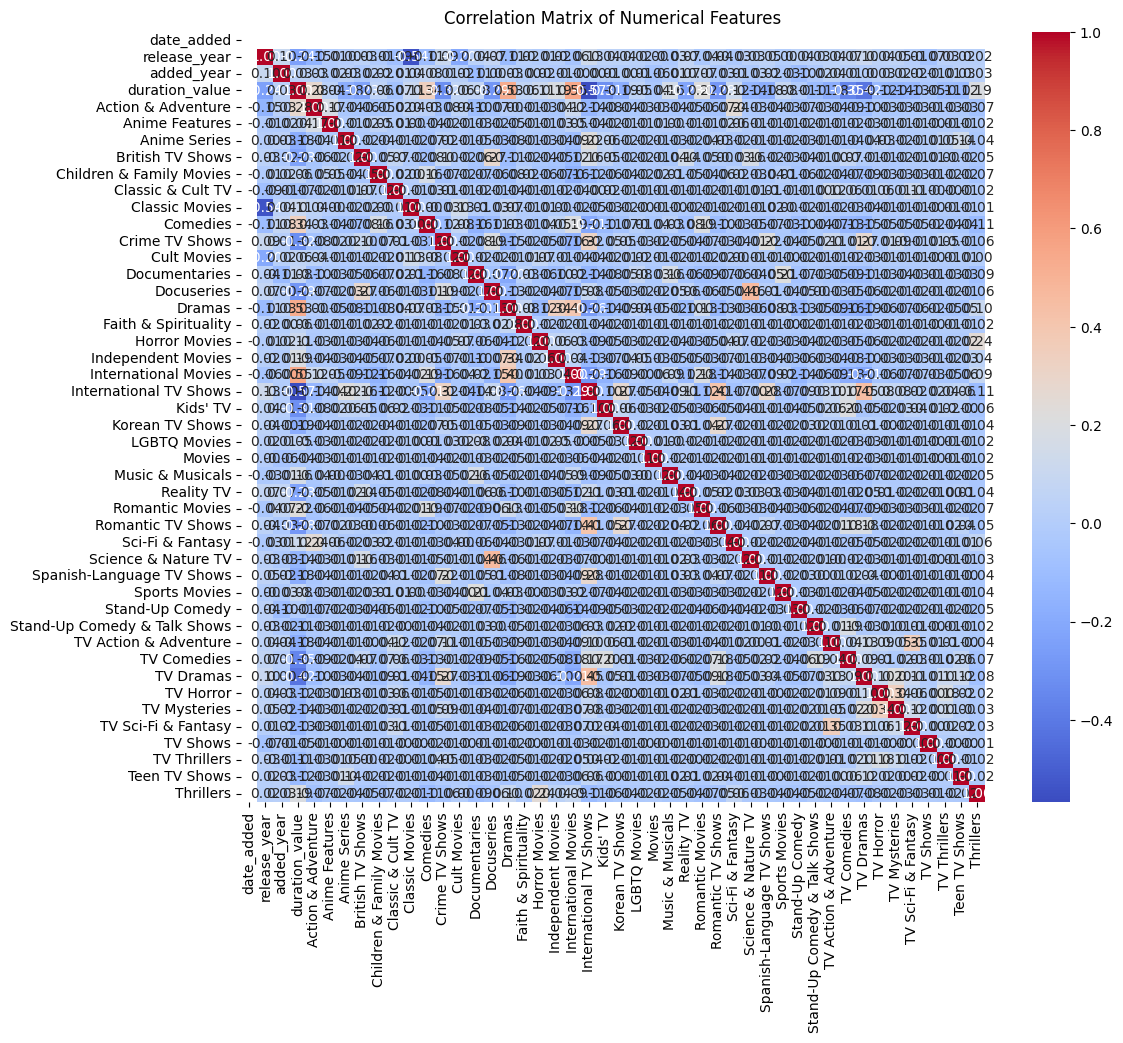

In [ ]:
# prompt: Calculate and visualize correlation matrices to better understand relationships between variables

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame (as defined in the previous code)

# Select numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


#11A.Data clustering Interactive model.
##K-means clustering helps to understand how data points are connected to each others . K stands for number of clusters . You can enjoy the following interactice clustering model.

### Subtask:
Perform K-means clustering on the prepared dataset.


**Reasoning**:
Perform K-means clustering on the selected numerical features after scaling them.



In [ ]:
# prompt: K means interactive clustering model to view release year

import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select all columns except those to be excluded
numerical_features = df.drop(columns=['title', 'director', 'cast', 'country', 'description',  'date_added'], errors='ignore').columns  # errors='ignore' handles cases where column might not exist

# Get numerical columns from the selected columns
numerical_features = df[numerical_features].select_dtypes(include=['number']).columns

# Remove specific columns from numerical_features if present
numerical_features = numerical_features.drop(['show_id', 'added_year'], errors='ignore') #errors='ignore' handles the case where 'show_id' or 'added_year' may not be present in the selected columns.



# Scale the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numerical_features])

# Perform K-means clustering (example with k=5, adjust as needed)
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Create an interactive scatter plot colored by cluster and showing 'release_year'
fig = px.scatter(df, x='release_year', y='duration_value', color='cluster', hover_data=['title'], title='K-Means Clustering of Netflix Content')
fig.show()

#11B.Evaluating the Performance of K-Means by using 'Silhoette_score' and 'Davies Building Score'

In [ ]:
# prompt:  Evaluate the performance of K-means clustering with metrics like silhouette score or Davies-Bouldin index.

from sklearn.metrics import silhouette_score, davies_bouldin_score

# ... (Your existing code) ...

# After performing K-means clustering:

# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_features, df['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, df['cluster'])
print(f"Davies-Bouldin Index: {db_index}")


Silhouette Score: 0.047684280510829576
Davies-Bouldin Index: 2.402576150119368


The Silhouette Score and Davies-Bouldin Index are metrics used to evaluate the quality of clusters produced by clustering algorithms like K-means.  They provide different perspectives on how well-separated and compact the clusters are.

**Silhouette Score:**

* **Concept:** Measures how similar a data point is to its own cluster (cohesion) compared to other clusters (separation).  It essentially calculates the average silhouette coefficient for all data points.
* **Calculation:** For each data point:
    1. **a:** The average distance between the data point and all other points *within the same cluster*.
    2. **b:** The average distance between the data point and all points in the *nearest neighboring cluster*.
    3. **Silhouette Coefficient (s):**  `s = (b - a) / max(a, b)`
* **Interpretation:**
    * **s close to +1:** The data point is well matched to its own cluster and poorly matched to neighboring clusters.
    * **s close to 0:** The data point is on or very close to the decision boundary between two neighboring clusters.
    * **s close to -1:** The data point is assigned to the wrong cluster.

* **Overall Score:** The average silhouette coefficient over all data points provides an overall measure of clustering quality. A higher silhouette score (closer to 1) indicates better-defined clusters.


**Davies-Bouldin Index:**

* **Concept:** Measures the average similarity between each cluster and its most similar cluster.  It considers both the within-cluster scatter and the between-cluster separation.
* **Calculation:**
    1. For each cluster *i*: Calculate the average distance between each point in the cluster and the cluster's centroid (Ri).
    2. For each pair of clusters *i* and *j*: Calculate the distance between their centroids (Dij).
    3. For each cluster *i*: find the cluster *j* (j != i) that maximizes `(Ri + Rj) / Dij`. This represents the similarity between cluster *i* and its most similar cluster.
    4. **Davies-Bouldin Index:** The average of these maximum similarities over all clusters.
* **Interpretation:** A lower Davies-Bouldin index indicates better clustering.  A value of 0 represents perfectly separated clusters.

**In your code:**

You are correctly calculating and printing both the Silhouette Score and the Davies-Bouldin Index after applying K-means clustering.

* A higher Silhouette score suggests better-defined clusters.
* A lower Davies-Bouldin Index suggests better-defined clusters.

You can use these scores to compare different clustering results (e.g., different numbers of clusters, different clustering algorithms) and choose the clustering with the best scores, considering the domain context of your data as well.

#11.C  A Model to View the details of movies added to Netflix .
# You need to select year (please note, it is a release year of the movie)
## Please view below:

In [ ]:
#  Interactive model to view the details of a year

import ipywidgets as widgets
from IPython.display import display, clear_output

# Assuming 'df' is your DataFrame (as defined in the previous code)

# Create a dropdown widget for selecting the year
year_options = sorted(df['release_year'].unique())
year_dropdown = widgets.Dropdown(
    options=year_options,
    description='Select Year:',
    value=year_options[0]  # Set the default value
)


# Create an output widget to display the details
output_widget = widgets.Output()

# Define the function to update the output based on the selected year
def update_output(change):
    selected_year = change.new
    with output_widget:
        clear_output()  # Clear previous output
        year_data = df[df['release_year'] == selected_year]

        if not year_data.empty:
          print(f"Details for year {selected_year}:")
          display(year_data.head())  # Show the first few rows of the data
          # Add more details or visualizations here based on your requirements, e.g.
          # display a histogram of rating, etc.
        else:
          print(f"No data available for year {selected_year}")


# Observe the dropdown for changes
year_dropdown.observe(update_output, names='value')

# Display the dropdown and output widget
display(year_dropdown)
display(output_widget)


Dropdown(description='Select Year:', options=(np.int64(1925), np.int64(1942), np.int64(1943), np.int64(1944), …

Output()

#11.D Interactive Model to view the details of Netflix shows as per year and age

In [ ]:
# prompt: Interactive model to view the details of year and age

# Assuming 'df' is your DataFrame (as defined in the previous code)

# Create a dropdown widget for selecting the year
year_options = sorted(df['release_year'].unique())
year_dropdown = widgets.Dropdown(
    options=year_options,
    description='Select Year:',
    value=year_options[0]  # Set the default value
)

# Create a text input widget for age
age_input = widgets.IntText(
    value=0,
    description='Enter Age:',
    disabled=False
)

# Create an output widget to display the details
output_widget = widgets.Output()

# Define the function to update the output based on the selected year and age
def update_output(change):
    selected_year = year_dropdown.value
    entered_age = age_input.value
    with output_widget:
        clear_output()  # Clear previous output
        year_data = df[df['release_year'] == selected_year]

        if not year_data.empty:
            print(f"Details for year {selected_year} and age {entered_age}:")
            display(year_data.head())  # Show the first few rows of the data
            # Add more details or visualizations here based on your requirements
        else:
            print(f"No data available for year {selected_year}")

# Observe the dropdown and text input for changes
year_dropdown.observe(update_output, names='value')
age_input.observe(update_output, names='value')

# Display the widgets
display(year_dropdown)
display(age_input)
display(output_widget)


Dropdown(description='Select Year:', options=(np.int64(1925), np.int64(1942), np.int64(1943), np.int64(1944), …

IntText(value=0, description='Enter Age:')

Output()

:![logo](https://upload.wikimedia.org/wikipedia/commons/0/08/Netflix_2015_logo.svg)

#Summary



# Key Findings from the Insights

# 1. Content Distribution:
#    - The analysis reveals the geographical distribution of Netflix content, highlighting the top countries with the most movies and TV shows.  A choropleth map visualizes this distribution effectively.
#    - Further investigation shows the types of content (movies vs. TV shows) available in different countries, allowing for regional content preference analysis.

# 2. Genre Popularity and Trends:
#    - The code identifies popular genres on Netflix and tracks genre trends over time.  This helps understand audience preferences and evolving content demand.
#    - Relationships between genre and release year, ratings, and other factors are examined to provide a deeper understanding of content performance.

# 3. Director Impact:
#    - The analysis investigates the impact of directors on content popularity and ratings.  It identifies top directors and analyzes their influence on specific genres.  

# 4. Content Duration:
#    - The analysis provides information about the duration of movies and TV shows, identifying the longest movies available.

# 5. Rating Distribution:
#    - The code analyzes the distribution of ratings for content on Netflix.  This allows for understanding content maturity levels and their representation on the platform.

# 6. Correlation Analysis:
#    - A correlation matrix and heatmap provide insights into relationships between numerical features in the dataset, helping identify potentially important relationships.

# 7. Clustering Analysis:
#    - K-means clustering is used to group similar content, visualized with an interactive scatter plot.  Silhouette score and Davies-Bouldin index help evaluate the quality of the clusters.

# 8. Interactive Exploration:
#    - The interactive widgets allow users to explore the data based on release year, age, and other criteria.  This dynamic exploration enhances the understanding of the data.


# Additional Notes:

# - Data Cleaning: The code includes steps for data cleaning, including handling missing values, outliers, and duplicates.  This ensures the reliability of the analysis.
# - Feature Engineering:  New features are generated from the existing data (e.g., extracting the year from the date added column), enhancing the richness of the analysis.
# - Visualization:  Plotly and other visualization libraries help to illustrate findings effectively.

# Overall, the notebook demonstrates a robust data analysis workflow using Python and several data science libraries. The interactive elements make the findings easily accessible and explore the data interactively.